Look at graphs generated from Generate_graphs_case_1

In [1]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import sys
import datetime
import seaborn as sns

# My scripts
sys.path.append(os.path.abspath(".."))
from util import plot_avg_degree, plot_G_density, plot_G_signs


Load graphs

# 

We have to scale the data, otherwise lgrmf will put equal weights to all nodes giving a complete graph

In [7]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_300_gest_huge_glasso_ebic_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

dict_keys(['dates', 'graph_dict', 'sector', 'cov_dict', 'GMV_portfolio_dict', 'max_sharpe_portfolio_dict', 'return_dict', 'window_size', 'stock_partition', 'gmv_div_dict', 'gmv_var_div_dict', 'sharpe_div_dict', 'sharpe_var_div_dict', 'uni_div_dict', 'uni_var_div_dict', 'cov_dict2', 'GMV_portfolio_dict2', 'max_sharpe_portfolio_dict2', 'return_dict2', 'gmv_div_dict2', 'gmv_var_div_dict2', 'sharpe_div_dict2', 'sharpe_var_div_dict2', 'uni_div_dict2', 'uni_var_div_dict2'])

Plot graph statistics

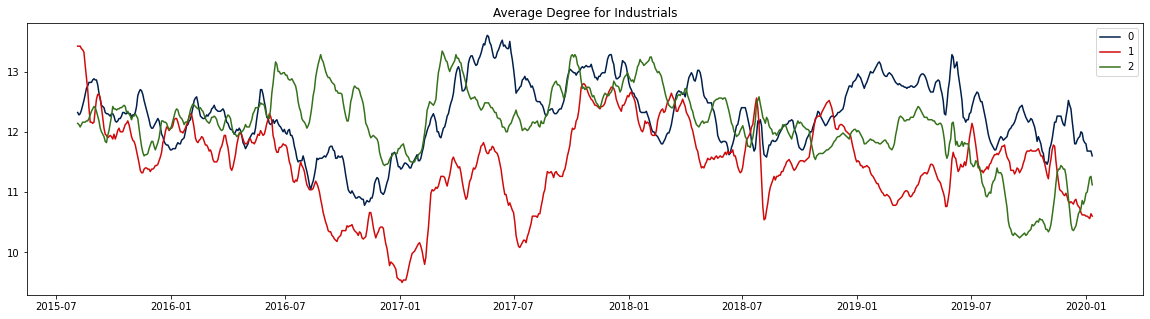

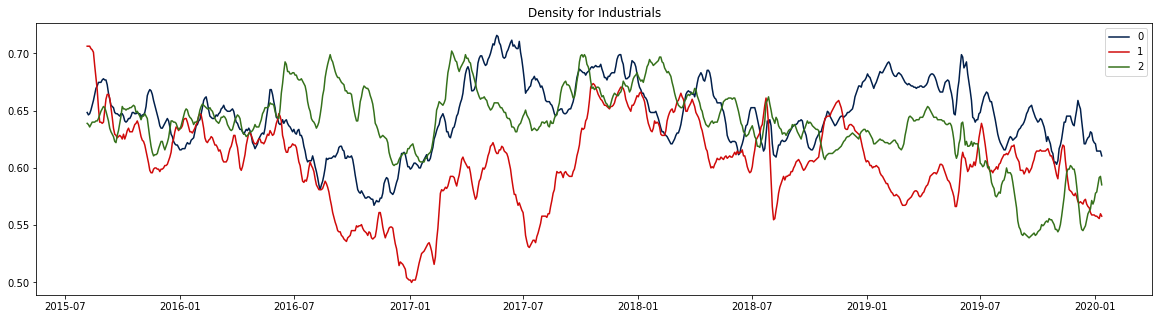

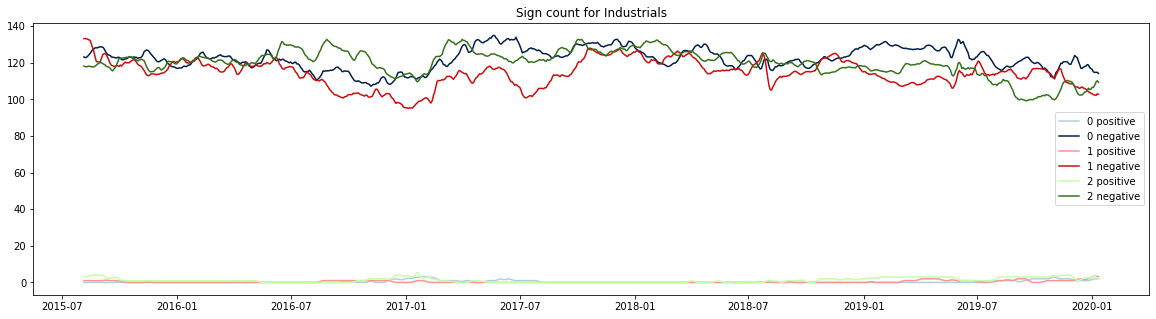

In [3]:


for idx in range(len(data_dict)):
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_avg_degree(data_dict[idx], ax = ax)
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_G_density(data_dict[idx], ax = ax)
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    plot_G_signs(data_dict[idx], ax = ax)
    

Plot example graphs

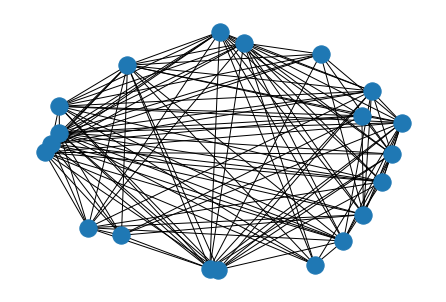

In [4]:
nx.draw(data_dict[0]['graph_dict'][0][300])

Look at if the splits are uniform

<AxesSubplot:>

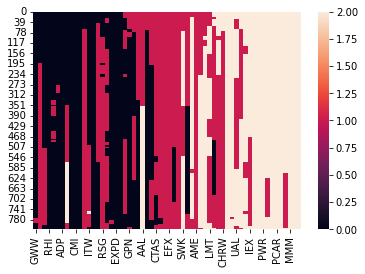

In [22]:
unique_stocks =np.concatenate((data_dict[idx]['stock_partition'][0][0],data_dict[idx]['stock_partition'][1][0],data_dict[idx]['stock_partition'][2][0]))
n = len(data_dict[idx]['stock_partition'][0])
p = len(unique_stocks)
unique_stocks = pd.DataFrame(np.zeros((n,p)), columns= unique_stocks)

for col in unique_stocks.columns:
    for i in range(len(data_dict[idx]['stock_partition'][0])):
        for j in range(3):
            if col in data_dict[idx]['stock_partition'][j][i]:
                unique_stocks[col].iloc[i] = j
                continue

sns.heatmap(unique_stocks)

Plot weights

(-10.0, 10.0)

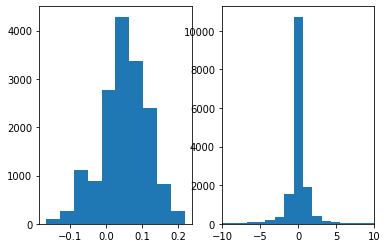

In [24]:
fig, ax = plt.subplots(1,2)
_ = ax[0].hist(np.hstack(data_dict[idx]['GMV_portfolio_dict'][0]))
_ = ax[1].hist(np.hstack(data_dict[idx]['max_sharpe_portfolio_dict'][0]), bins = 1000)
ax[1].set_xlim([-10,10])

Plot diversification

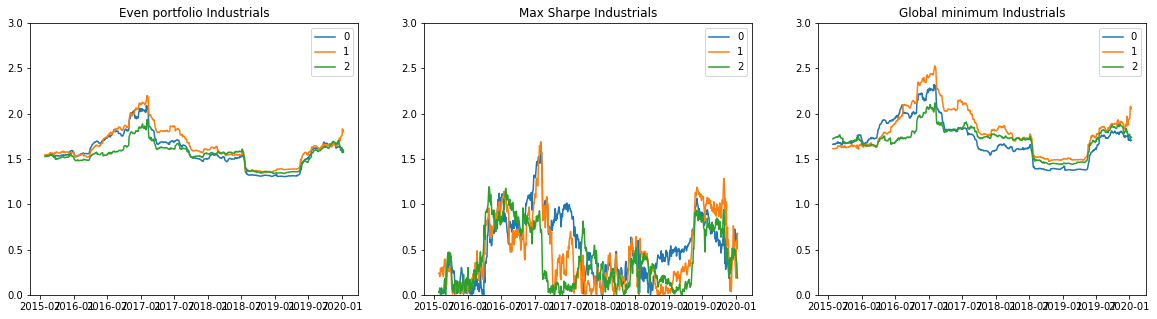

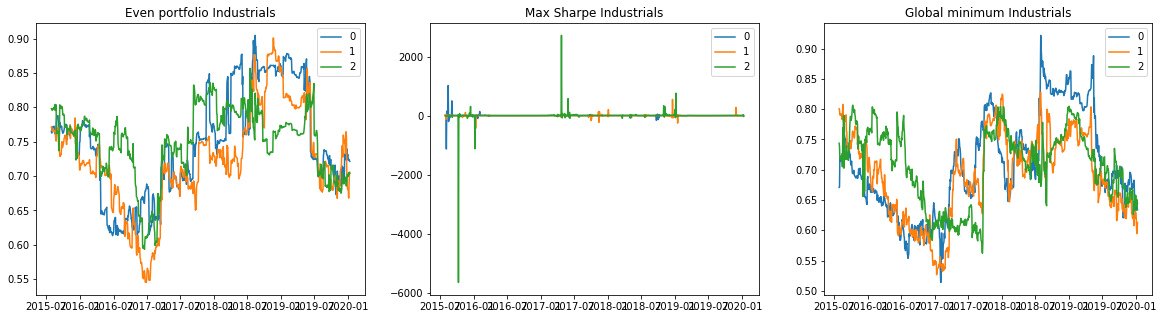

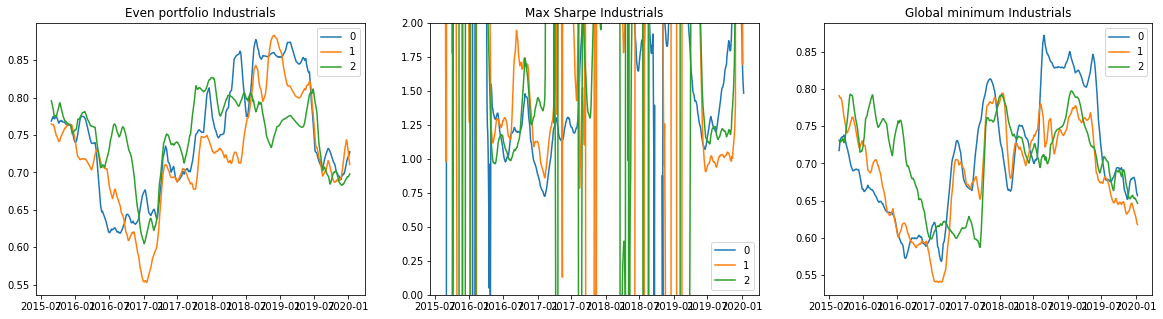

In [5]:
for idx in range(len(data_dict)):
    sector = data_dict[idx]['sector']


    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['sharpe_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['gmv_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}', ylim = [0,3])

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}')

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}',ylim = [0,2])
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[2], title = f'Global minimum {sector}')

Look at mmd

In [8]:
with open(f'../data/mmd_test/case_study_1_d_1_winlen_300_gest_huge_glasso_ebic_scale_None_n_50_rw_None_dstep_1.pkl', 'rb') as f:
    test_info = pickle.load(f)
test_info[0].keys()

dict_keys(['info_dict', 'sector', 'n', 'dates'])

check if hyperparameter stayed the same throughout

In [9]:
print(np.unique(test_info[0]['info_dict']['c']))
print(np.unique(test_info[0]['n']))

[0.1]
[50]


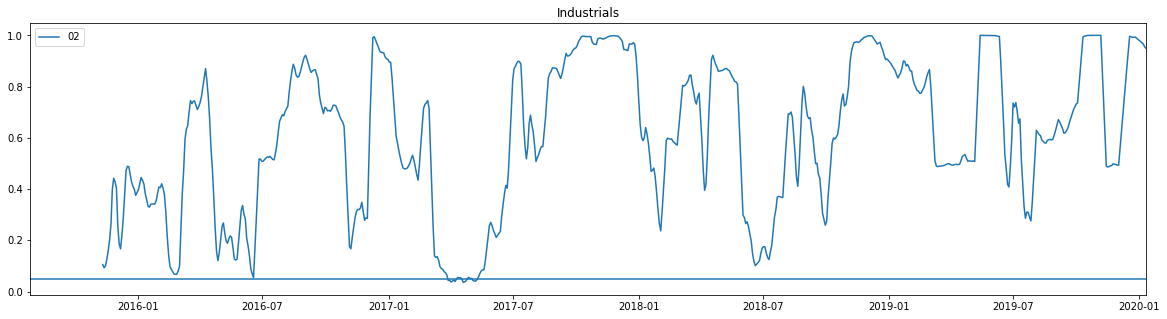

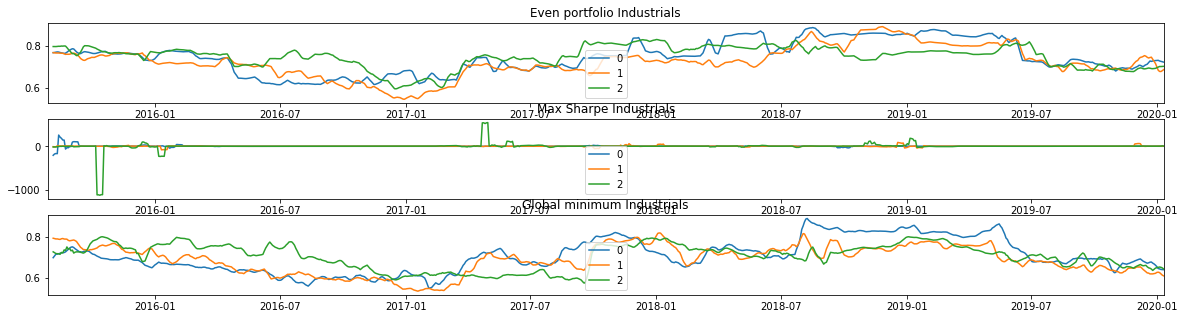

In [12]:

for idx in range(len(test_info)):
    tmp = test_info[idx]['info_dict']
    sector = test_info[idx]['sector']
    fig ,ax = plt.subplots(1,1, figsize = (20,5))

    tmp['id'] = tmp['group_i'].astype(str) + tmp['group_j'].astype(str) 
    for id in ["02"]:#np.unique(tmp['id']):
        #ax.plot(tmp['dates'].loc[tmp['id'] == id], tmp['MONK_EST'].loc[tmp['id'] == id], label = "monk")
        tmp_tmp = tmp.loc[tmp['id'] == id]

        ax.plot(tmp['dates'].loc[tmp['id'] == id], tmp['MMD_u'].loc[tmp['id'] == id].rolling(4).mean(), label = id)
    ax.axhline(y = 0.05)
    ax.legend()
    ax.set_title(sector)
    ax.set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])

    fig, ax = plt.subplots(3,1, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[2], title = f'Global minimum {sector}')
    ax[0].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])
    ax[1].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])
    ax[2].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])

Let's test manually. Seems like there is some fishyness going on

In [11]:
index = np.where((data_dict[0]['dates'] >= datetime.date(2016, 7, 28)) & (data_dict[0]['dates'] <= datetime.date(2017, 1, 28)))[0]
n = len(index)
n

93

check average degree

In [12]:
data_dict[idx]['graph_dict'][0][i]

NameError: name 'idx' is not defined

In [14]:
from util import avg_degree
G1 = [data_dict[0]['graph_dict'][0][i] for i in index] 
G2 = [data_dict[0]['graph_dict'][2][i] for i in index]
Gs = G1 + G2

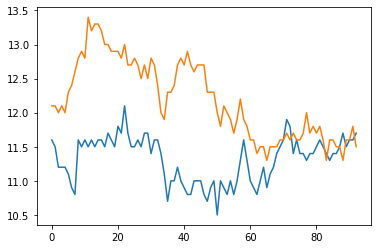

In [18]:
plt.plot(range(len(G1)), [avg_degree(G1[i]) for i in range(len(G1))])
plt.plot(range(len(G2)), [avg_degree(G2[i]) for i in range(len(G2))])

In [31]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw

rw_kernel = rw.RandomWalk(Gs, c = 0.01, normalize=0)
K = rw_kernel.fit_ARKU_plus(r = 6, normalize_adj=False, verbose=False)

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l]#, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n )]#, 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    #dict(Q = 3, y1 = list(range(bg1.n)), y2 = list(range(bg1.n, bg1.n+bg2.n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 1000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")



p_value {'MMD_b': 1.0, 'MMD_u': 1.0, 'MMD_l': 1.0}


In [35]:
calc_ok = True
for c in [0.0001, 0.00001, 0.000001]:

    rw_kernel = rw.RandomWalk(Gs, c = c, normalize=0)
    K = rw_kernel.fit_ARKU_plus(r = 6, normalize_adj=False, verbose=False)

    v,_ = np.linalg.eigh(K)
    v[np.abs(v) < 10e-5] = 0
    if np.all(v) >= 0:
        calc_ok = True
        break
    calc_ok = False

array([-8.80985097e-01, -1.15241172e-02, -3.22822735e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

<AxesSubplot:>

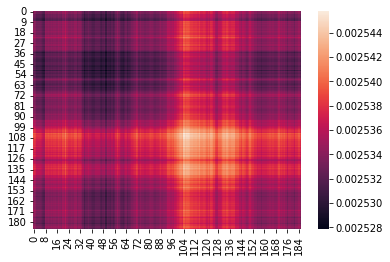

In [30]:
import seaborn as sns
sns.heatmap(K)

In [194]:
kernel_hypothesis.sample_test_statistic

{'MMD_b': 2.710505431213761e-20, 'MMD_u': 0.0, 'MMD_l': 0.0}

# Sklean glasso using 3 folds

In [261]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_150_gest_sklearn_glasso_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

dict_keys(['dates', 'graph_dict', 'sector', 'cov_dict', 'GMV_portfolio_dict', 'max_sharpe_portfolio_dict', 'return_dict', 'window_size', 'stock_partition', 'gmv_div_dict', 'gmv_var_div_dict', 'sharpe_div_dict', 'sharpe_var_div_dict', 'uni_div_dict', 'uni_var_div_dict', 'cov_dict2', 'GMV_portfolio_dict2', 'max_sharpe_portfolio_dict2', 'return_dict2', 'gmv_div_dict2', 'gmv_var_div_dict2', 'sharpe_div_dict2', 'sharpe_var_div_dict2', 'uni_div_dict2', 'uni_var_div_dict2'])

Graph statistics

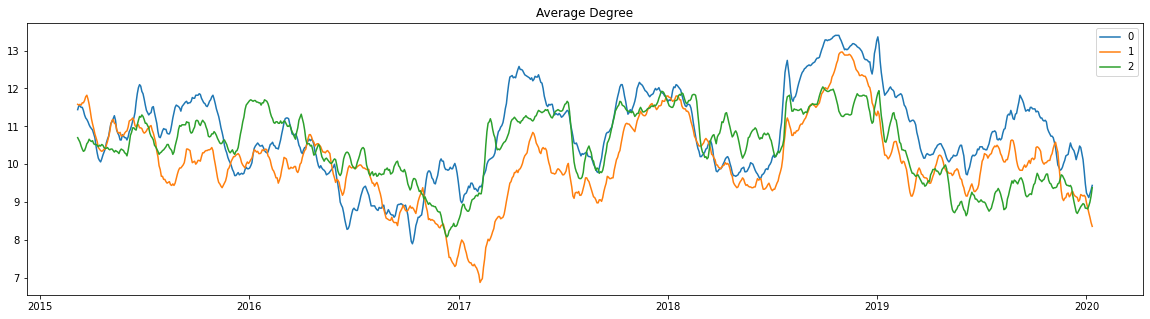

In [262]:
for idx in range(len(data_dict)):

    avg_deg_0 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][0][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][0]))]
    avg_deg_1 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][1][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][1]))] 
    avg_deg_2 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][2][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][2]))]

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_0).rolling(5).mean().iloc[:,0], label = 0)
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_1).rolling(5).mean().iloc[:,0], label = 1) 
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_2).rolling(5).mean().iloc[:,0], label = 2)
    ax.set_title('Average Degree')
    ax.legend() 

Histogram of portfolio weights

(-10.0, 10.0)

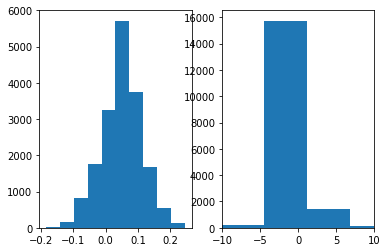

In [263]:
fig, ax = plt.subplots(1,2)
_ = ax[0].hist(np.hstack(data_dict[idx]['GMV_portfolio_dict'][0]))
_ = ax[1].hist(np.hstack(data_dict[idx]['max_sharpe_portfolio_dict'][0]), bins = 1000)
ax[1].set_xlim([-10,10])

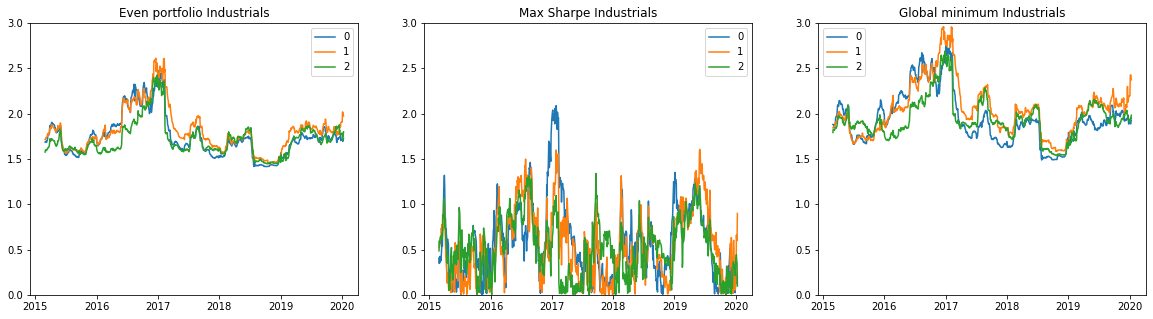

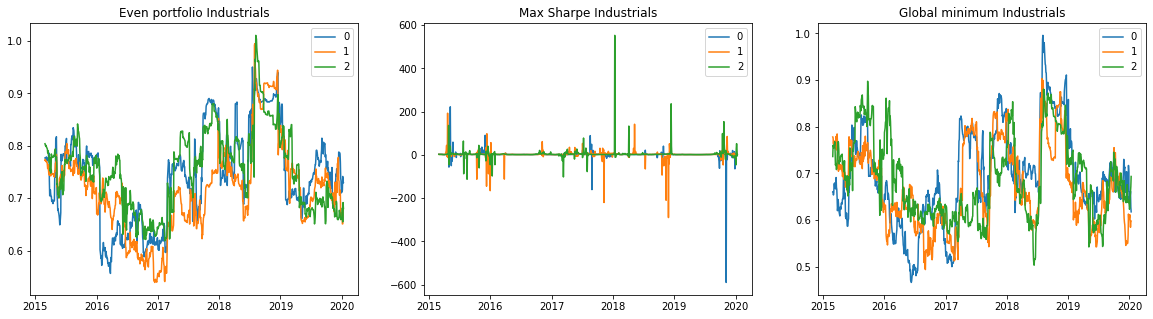

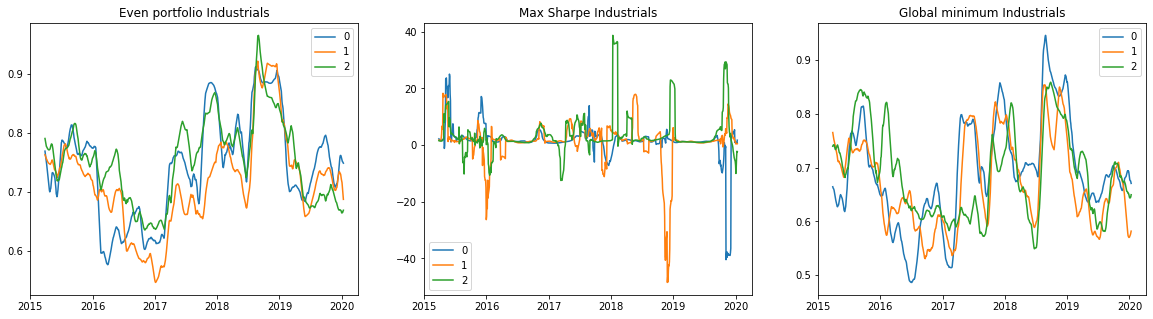

In [264]:
for idx in range(len(data_dict)):
    sector = data_dict[idx]['sector']


    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['sharpe_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['gmv_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}', ylim = [0,3])

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}')

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[2], title = f'Global minimum {sector}')

# Huge Glasso EBIC

In [17]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_300_gest_huge_glasso_ebic_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

dict_keys(['dates', 'graph_dict', 'sector', 'cov_dict', 'GMV_portfolio_dict', 'max_sharpe_portfolio_dict', 'return_dict', 'window_size', 'stock_partition', 'gmv_div_dict', 'gmv_var_div_dict', 'sharpe_div_dict', 'sharpe_var_div_dict', 'uni_div_dict', 'uni_var_div_dict', 'cov_dict2', 'GMV_portfolio_dict2', 'max_sharpe_portfolio_dict2', 'return_dict2', 'gmv_div_dict2', 'gmv_var_div_dict2', 'sharpe_div_dict2', 'sharpe_var_div_dict2', 'uni_div_dict2', 'uni_var_div_dict2'])

Plot graph statistics

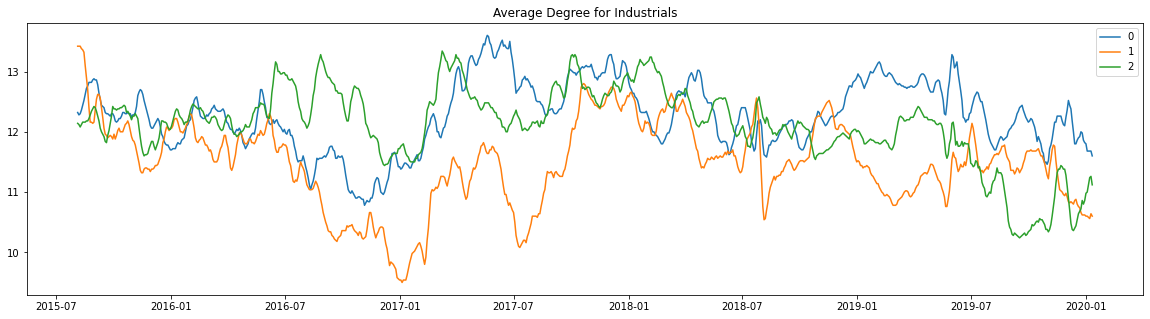

In [18]:
for idx in range(len(data_dict)):
    plot_avg_degree(data_dict[idx])

Look if companies are often jumping

# new